# Praca domowa 6
## Andrzej Pióro, Jan Kruszewski

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Wczytujemy dane

In [2]:
df = pd.read_csv('heart.csv')
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


#### Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


Nasza ramka danych nie posiada braków danych.

In [4]:
np.unique(df['chd'])

array([0, 1], dtype=int64)

In [5]:
np.unique(df['famhist'])

array(['Absent', 'Present'], dtype=object)

Mamy 10 zmiennych z czego tylko zmienna `famhist` nie jest zmienną liczbową. Przyjmuje ona jednak tylko 2 wartości. Przetransformujmy ją więc na zmienną binarną. Pozostałe zmienne są zmiennymi ciągłymi poza `chd`, która również jest binarna.

In [6]:
df['famhist'] = df['famhist'].replace({'Absent':0, 'Present':1})

#### Wykres korealcji

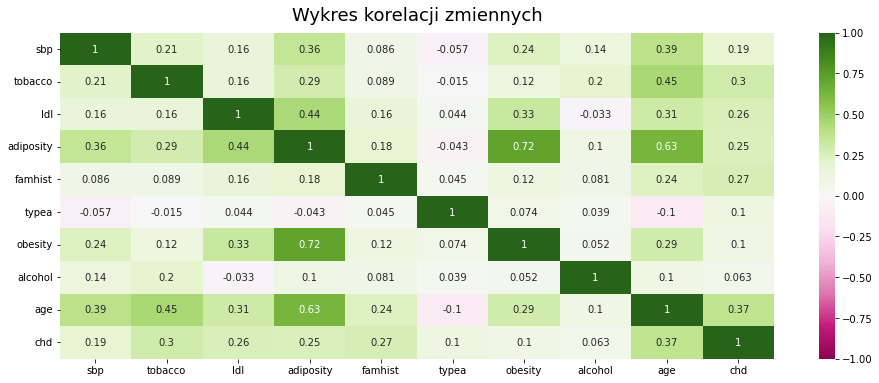

In [7]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="PiYG");
heatmap.set_title('Wykres korelacji zmiennych', fontdict={'fontsize':18}, pad=12);

W naszej ramce danych mamy 2 pary zmiennych dosyć mocno skorelowanych. Są to zmienne `obesity` i `adiposity` oraz `age` i `adiposity`.

#### Standaryzacja

In [8]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1.058564,1.823073,0.478412,-0.295503,1.185854,-0.418470,-0.176786,3.277738,0.629336,1.373863
1,0.277089,-0.790237,-0.159680,0.412140,-0.843274,0.193344,0.671373,-0.612745,1.383115,1.373863
2,-0.992806,-0.774980,-0.609245,0.884332,1.185854,-0.112563,0.735519,-0.541183,0.218184,-0.727875
3,1.546985,0.842264,0.807126,1.624141,1.185854,-0.214532,1.412621,0.295062,1.040488,1.373863
4,-0.211332,2.171805,-0.599577,0.305351,1.185854,0.703189,-0.012856,1.647775,0.423760,1.373863
...,...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,-0.843274,1.111065,0.571590,-0.696983,1.040488,-0.727875
458,2.133091,0.123004,-0.159680,0.861173,-0.843274,-0.112563,0.609602,0.068519,0.629336,1.373863
459,-1.481228,-0.138545,-1.522877,-1.309364,-0.843274,-1.336191,-1.414575,0.392385,0.834912,-0.727875
460,-0.992806,0.384553,3.320823,0.692625,-0.843274,1.111065,0.310252,0.283203,-0.192969,-0.727875


### Biplot

Zastosujmy PCA dla naszego zbioru. Sprawdźmy ile pierwszych głównych składowych zawiera większość wariancji obecnej w wyjściowym zbiorze.

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_features_df)
np.cumsum(pca.explained_variance_ratio_)

array([0.30864655, 0.43171326, 0.54633428, 0.64832292, 0.73556835,
       0.81233184, 0.87960936, 0.93700627, 0.98251794, 1.        ])

<BarContainer object of 10 artists>

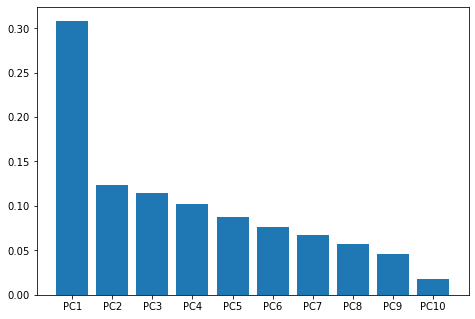

In [10]:
pc_names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pc_names, pca.explained_variance_ratio_)

5 pierwszych komponentów zawiera około 73,6% całkowitej wariancji. Widać, że zdecydowanie najwięcej wariancji niesie za sobą 1. komponent.

#### Wartości własne

Teraz przyjrzyjmy się wartością własnym dla kolejnych głównych komponentów.

In [11]:
pca.explained_variance_

array([3.09316061, 1.23333668, 1.14869663, 1.02209866, 0.87434685,
       0.76930002, 0.67423459, 0.5752142 , 0.45610395, 0.17519979])

Pierwsze 4 komponenty posiadają wartości własne o wartości większej niż 1. Wnoszą więc również większą wariancję.

#### Wektory własne

Wartości wektorów własnych. Wartości wektora własnego oznaczają współczynniki korelacji pomiędzy oryginalnymi zmiennymi a głównymi komponentami.

In [12]:
corr_coef = pca.components_
num_pc = pca.n_features_
corr_coef_df = pd.DataFrame.from_dict(dict(zip(pc_names, corr_coef)))
corr_coef_df['zmienna'] = scaled_features_df.columns.values
corr_coef_df = corr_coef_df.set_index('zmienna')
corr_coef_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
zmienna,,,,,,,,,,
sbp,0.306354,0.079621,-0.304567,0.101147,0.000665,0.818800,0.198138,-0.207390,0.209550,-0.014193
tobacco,0.303267,0.424684,-0.155814,0.009734,0.422825,-0.341577,-0.305815,-0.359747,0.427324,-0.047940
ldl,0.324056,-0.274112,0.248650,-0.164197,0.126205,-0.252048,0.714845,-0.367461,0.020774,0.071725
adiposity,0.481140,-0.307111,-0.093442,0.099940,-0.060253,-0.096738,-0.148810,0.144787,-0.159888,-0.757501
famhist,0.207459,0.225550,0.411099,-0.247616,-0.727815,0.030297,-0.215037,-0.283716,0.132527,-0.028988
typea,-0.001496,0.021824,0.683272,0.520783,0.315653,0.231459,-0.172006,-0.192190,-0.200129,-0.040744
obesity,0.361037,-0.497441,0.014716,0.306996,-0.124219,-0.088234,-0.239038,0.234507,0.371810,0.504134
alcohol,0.115337,0.448464,-0.168701,0.647994,-0.333054,-0.256188,0.362347,0.130150,-0.106458,0.033114
age,0.448790,0.128553,-0.156603,-0.180948,0.076865,0.008036,-0.201324,-0.058254,-0.717006,0.400999


Dodatnie i ujemne wartości odzwierciedlają dodatnie i ujemne skorelowanie głównych składowych ze zmiennymi.

#### Biplot

Teraz stworzymy 2 biploty. Pierwszy dla 2 wymiarów (PC1 i PC2) oraz drugi dla 3 wymierów (PC1, PC2, PC3).

In [13]:
#!pip install bioinfokit

##### 2 wymiary

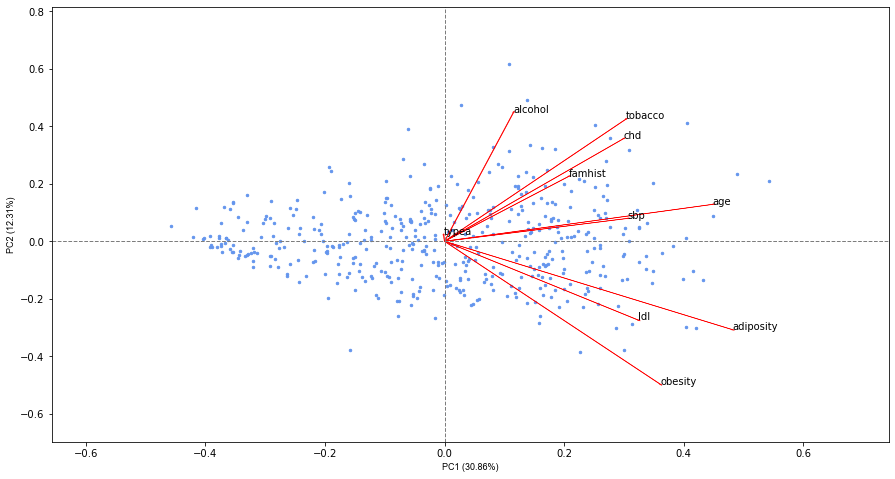

In [14]:
from bioinfokit.visuz import cluster
pca_sc= PCA().fit_transform(scaled_features_df)
cluster.biplot(cscore=pca_sc, loadings=corr_coef, labels=scaled_features_df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2), colordot = 'cornflowerblue', show=True, arrowcolor= 'red', dim=(15,8))


Gdy zmienne są mocno powiązane, kąt pomiędzy wektorami je oznaczającymi jest mały. Widzimy, że zmienne `age` i `sbp` są mocno powiązane. Tak samo zmienne `famhist` i `chd` czy zmienne `adiposity` i `ldl`. Zmienne te potencjalnie mogą formować różne klastry.

##### 3 wymiary

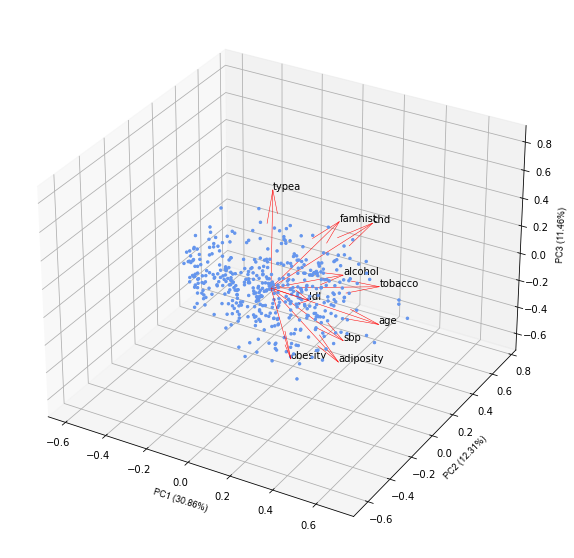

In [15]:
cluster.biplot(cscore=pca_sc, loadings=corr_coef, labels=scaled_features_df.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca.explained_variance_ratio_[2]*100, 2), colordot = 'cornflowerblue', show=True, arrowcolor= 'red',dim=(30,10))

#### Ostateczne PCA dla 5 komponentów

In [16]:
pca_final = PCA(n_components=5)
principalComponents = pca_final.fit_transform(scaled_features_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,2.144487,3.205643,-0.429942,1.088973,-0.891844
1,1.020159,-0.522892,0.125104,-0.415968,0.797768
2,0.018283,-1.088082,0.411928,-0.239083,-1.397138
3,3.440847,0.077397,0.078012,-0.146299,-0.488475
4,1.578226,2.549123,0.654283,0.816433,-0.056731
...,...,...,...,...,...
457,1.701933,-1.307852,-0.822786,0.869835,0.790863
458,1.800198,0.107493,-0.831240,0.225100,0.784364
459,-2.100816,1.150583,-1.516633,-0.653033,-0.017344
460,0.885488,-1.516618,1.147332,0.725467,1.210415


## Podsumowanie 

Ostatecznie do PCA wybieramy 5 pierwszych komponentów. Jest to najlepszy wybór ponieważ:
- Zawierają one większość całkowitej wariancji - około 73,6%. Stanowią zatem dobre przybliżenie orginalnego zbioru zawierającego 10 zmiennych.
- Wartości własne odpowiadające pierwszym czterem składowym mają wartość większą niż 1, co za tym idzie wnoszą większą wariancję. Wartość ta dla PC5 to około 0.87.
    